In [1]:
import pandas as pd
import numpy as np
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read in data
training = pd.read_csv("all/training.csv")

In [3]:
training.shape

(7049, 31)

In [4]:
training.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [5]:
# shuffle dataset for training/validation split later
np.random.seed(666)
shuffle = np.random.permutation(np.arange(training.shape[0]))
training = training.iloc[shuffle].reset_index(drop=True)

In [6]:
# split out image values
image = []
for i in range(training.shape[0]):
    img = training['Image'][i].split(' ')
    img = ['0' if j == '' else j for j in img]
    image.append(img)

In [7]:
# create training and validation set (80/20 split)
X = np.array(image, dtype = 'float')
X_train, X_val = X[:5640], X[5640:]
print(X_train.shape, X_val.shape)

(5640, 9216) (1409, 9216)


In [8]:
# create training and validation labels (80/20 split)
labels = training.drop('Image', axis=1)
y = np.array(labels, dtype = 'float')
y_train, y_val = y[:5640], y[5640:]
print(y_train.shape, y_val.shape)

(5640, 30) (1409, 30)


In [9]:
# remove missing labels for now
X_train_nm = X_train[~np.isnan(y_train).any(axis=1)]
y_train_nm = y_train[~np.isnan(y_train).any(axis=1)]
X_val_nm = X_val[~np.isnan(y_val).any(axis=1)]
y_val_nm = y_val[~np.isnan(y_val).any(axis=1)]
print(X_train_nm.shape)
print(y_train_nm.shape)
print(X_val_nm.shape)
print(y_val_nm.shape)

(1692, 9216)
(1692, 30)
(448, 9216)
(448, 30)


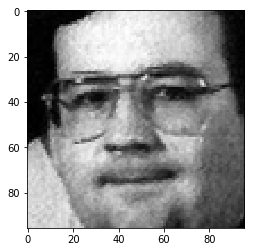

In [18]:
# show image
plt.imshow(X_train[666].reshape(96,96),cmap='gray')
plt.show()

## Baseline: Single Layer CNN with 10 Filters

In [11]:
# reshape data for CNN input
X_train_nm = X_train_nm.reshape(-1,96,96,1)
X_val_nm = X_val_nm.reshape(-1,96,96,1)

In [12]:
# Single Layer CNN
np.random.seed(666)

# create model
model = Sequential()
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(Flatten())
model.add(Dense(30))

# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_cnn = model.fit(X_train_nm, y_train_nm, epochs=100, shuffle=True, batch_size=32, validation_data=(X_val_nm, y_val_nm), verbose=2)


Train on 1692 samples, validate on 448 samples
Epoch 1/100
 - 2s - loss: 157.4355 - rmse: 157.4355 - mean_absolute_error: 134.8308 - mean_absolute_percentage_error: 334.0724 - val_loss: 19.5005 - val_rmse: 19.5005 - val_mean_absolute_error: 15.6962 - val_mean_absolute_percentage_error: 36.8571
Epoch 2/100
 - 0s - loss: 15.7564 - rmse: 15.7564 - mean_absolute_error: 12.1876 - mean_absolute_percentage_error: 28.3079 - val_loss: 13.4240 - val_rmse: 13.4240 - val_mean_absolute_error: 10.3125 - val_mean_absolute_percentage_error: 23.3446
Epoch 3/100
 - 0s - loss: 10.5585 - rmse: 10.5585 - mean_absolute_error: 8.0859 - mean_absolute_percentage_error: 18.4176 - val_loss: 10.1900 - val_rmse: 10.1900 - val_mean_absolute_error: 7.7567 - val_mean_absolute_percentage_error: 16.9041
Epoch 4/100
 - 0s - loss: 8.4136 - rmse: 8.4136 - mean_absolute_error: 6.3866 - mean_absolute_percentage_error: 14.2490 - val_loss: 9.4508 - val_rmse: 9.4508 - val_mean_absolute_error: 7.0419 - val_mean_absolute_percent

Epoch 36/100
 - 1s - loss: 3.5233 - rmse: 3.5233 - mean_absolute_error: 2.4354 - mean_absolute_percentage_error: 5.8302 - val_loss: 8.9047 - val_rmse: 8.9047 - val_mean_absolute_error: 6.5613 - val_mean_absolute_percentage_error: 14.3101
Epoch 37/100
 - 1s - loss: 3.8023 - rmse: 3.8023 - mean_absolute_error: 2.5212 - mean_absolute_percentage_error: 6.1638 - val_loss: 9.5900 - val_rmse: 9.5900 - val_mean_absolute_error: 6.7553 - val_mean_absolute_percentage_error: 14.8338
Epoch 38/100
 - 1s - loss: 4.0162 - rmse: 4.0162 - mean_absolute_error: 2.8085 - mean_absolute_percentage_error: 6.6643 - val_loss: 9.1558 - val_rmse: 9.1558 - val_mean_absolute_error: 6.4546 - val_mean_absolute_percentage_error: 14.1441
Epoch 39/100
 - 0s - loss: 3.8536 - rmse: 3.8536 - mean_absolute_error: 2.7318 - mean_absolute_percentage_error: 6.3953 - val_loss: 9.7143 - val_rmse: 9.7143 - val_mean_absolute_error: 6.8401 - val_mean_absolute_percentage_error: 14.9489
Epoch 40/100
 - 1s - loss: 3.9173 - rmse: 3.9173

Epoch 71/100
 - 0s - loss: 3.6728 - rmse: 3.6728 - mean_absolute_error: 2.6189 - mean_absolute_percentage_error: 6.1841 - val_loss: 9.9722 - val_rmse: 9.9722 - val_mean_absolute_error: 6.9441 - val_mean_absolute_percentage_error: 15.1284
Epoch 72/100
 - 0s - loss: 3.2800 - rmse: 3.2800 - mean_absolute_error: 2.3310 - mean_absolute_percentage_error: 5.5873 - val_loss: 9.6851 - val_rmse: 9.6851 - val_mean_absolute_error: 6.7862 - val_mean_absolute_percentage_error: 14.7143
Epoch 73/100
 - 0s - loss: 3.4031 - rmse: 3.4031 - mean_absolute_error: 2.3245 - mean_absolute_percentage_error: 5.5809 - val_loss: 10.0083 - val_rmse: 10.0083 - val_mean_absolute_error: 6.9762 - val_mean_absolute_percentage_error: 15.1982
Epoch 74/100
 - 1s - loss: 3.2670 - rmse: 3.2670 - mean_absolute_error: 2.2868 - mean_absolute_percentage_error: 5.6042 - val_loss: 9.8779 - val_rmse: 9.8779 - val_mean_absolute_error: 6.8811 - val_mean_absolute_percentage_error: 14.9216
Epoch 75/100
 - 0s - loss: 3.9276 - rmse: 3.92

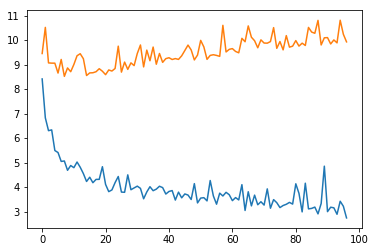

In [13]:
# plot metrics
plt.plot(history_cnn.history['rmse'][3:])
plt.plot(history_cnn.history['val_rmse'][3:])
plt.show()

In [14]:
# overfitted, redo with 13 epochs
np.random.seed(666)

# create model
model = Sequential()
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(Flatten())
model.add(Dense(30))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

%time history_cnn2= model.fit(X_train_nm, y_train_nm, epochs=13, shuffle=True, batch_size=32, validation_data=(X_val_nm, y_val_nm), verbose=2)


Train on 1692 samples, validate on 448 samples
Epoch 1/13
 - 1s - loss: 157.4355 - rmse: 157.4355 - mean_absolute_error: 134.8308 - mean_absolute_percentage_error: 334.0724 - val_loss: 19.5005 - val_rmse: 19.5005 - val_mean_absolute_error: 15.6962 - val_mean_absolute_percentage_error: 36.8571
Epoch 2/13
 - 0s - loss: 15.7564 - rmse: 15.7564 - mean_absolute_error: 12.1876 - mean_absolute_percentage_error: 28.3079 - val_loss: 13.4240 - val_rmse: 13.4240 - val_mean_absolute_error: 10.3125 - val_mean_absolute_percentage_error: 23.3445
Epoch 3/13
 - 0s - loss: 10.5585 - rmse: 10.5585 - mean_absolute_error: 8.0859 - mean_absolute_percentage_error: 18.4176 - val_loss: 10.1900 - val_rmse: 10.1900 - val_mean_absolute_error: 7.7567 - val_mean_absolute_percentage_error: 16.9041
Epoch 4/13
 - 0s - loss: 8.4136 - rmse: 8.4136 - mean_absolute_error: 6.3866 - mean_absolute_percentage_error: 14.2490 - val_loss: 9.4508 - val_rmse: 9.4508 - val_mean_absolute_error: 7.0419 - val_mean_absolute_percentage_

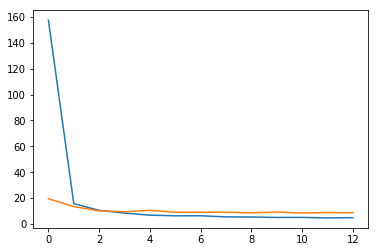

In [15]:
# plot metrics
plt.plot(history_cnn2.history['rmse'])
plt.plot(history_cnn2.history['val_rmse'])
plt.show()

In [16]:
# look at final RMSE value after 10 epochs
print(history_cnn2.history.get('val_rmse')[-1])
print(history_cnn2.history.get('rmse')[-1])

8.70781489780971
4.879832740089291


### Baseline Validation RMSE: 8.7078